In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Load the dataset
data = pd.read_csv('twitter_2.csv')
data.columns = ["target", "ids", "date", "flag", "user", "text"]

In [3]:
# Stratified sampling to get a subset of 50,000 samples
sample_size = 20000
data_sampled = data.groupby("target", group_keys=False).apply(lambda x: x.sample(min(len(x), sample_size), random_state=42))

In [4]:
data_sampled.shape

(40000, 6)

In [5]:
data_sampled.head

<bound method NDFrame.head of          target         ids                          date      flag  \
212188        0  1974671472  Sat May 30 13:36:33 PDT 2009  NO_QUERY   
299036        0  1997882402  Mon Jun 01 17:37:12 PDT 2009  NO_QUERY   
475977        0  2177756662  Mon Jun 15 06:39:05 PDT 2009  NO_QUERY   
385829        0  2053681109  Sat Jun 06 05:22:18 PDT 2009  NO_QUERY   
138859        0  1880667015  Fri May 22 02:03:41 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1327749       4  2015425445  Wed Jun 03 04:37:52 PDT 2009  NO_QUERY   
1320965       4  2014642083  Wed Jun 03 02:12:15 PDT 2009  NO_QUERY   
1490317       4  2068855838  Sun Jun 07 14:49:25 PDT 2009  NO_QUERY   
1119788       4  1973828077  Sat May 30 11:54:51 PDT 2009  NO_QUERY   
1499248       4  2070769005  Sun Jun 07 18:15:57 PDT 2009  NO_QUERY   

                   user                                               text  
212188          crail00      @dickiemaxx

In [6]:
data_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 212188 to 1499248
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  40000 non-null  int64 
 1   ids     40000 non-null  int64 
 2   date    40000 non-null  object
 3   flag    40000 non-null  object
 4   user    40000 non-null  object
 5   text    40000 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

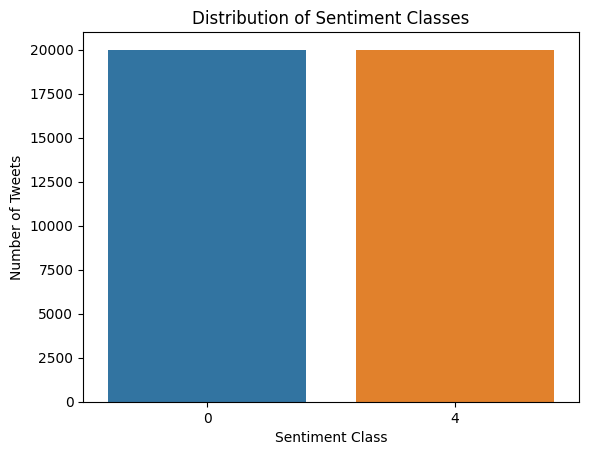

In [9]:
# Distribution of Sentiment Classes
sentiment_counts = data_sampled["target"].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel("Sentiment Class")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Sentiment Classes")
plt.show()

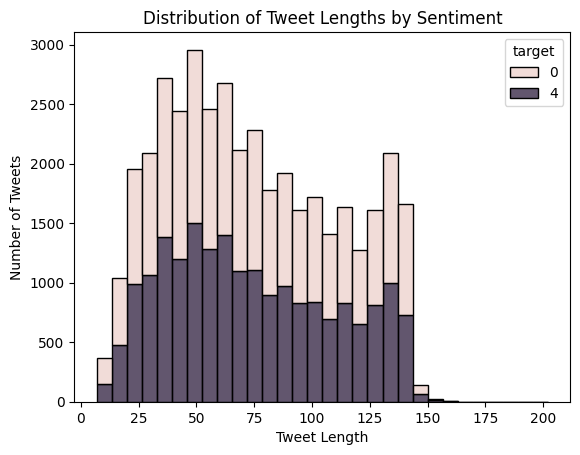

In [10]:
# Tweet Length Analysis
data_sampled["tweet_length"] = data_sampled["text"].apply(len)
sns.histplot(data=data_sampled, x="tweet_length", hue="target", multiple="stack", bins=30)
plt.xlabel("Tweet Length")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Tweet Lengths by Sentiment")
plt.show()

In [11]:
# Word Frequency Analysis
from collections import Counter
from nltk.tokenize import word_tokenize

def get_word_frequencies(text):
    tokens = word_tokenize(text)
    word_freq = Counter(tokens)
    return word_freq

# Combine all text for each sentiment class
sentiment_texts = data_sampled.groupby("target")["text"].apply(lambda x: ' '.join(x))
sentiment_word_frequencies = sentiment_texts.apply(get_word_frequencies)

# Analyze most common words for each sentiment class
for sentiment, word_freq in sentiment_word_frequencies.items():
    print(f"Sentiment: {sentiment}")
    print("Top 10 Common Words:")
    for word, freq in word_freq.most_common(10):
        print(f"{word}: {freq}")
    print()

Sentiment: 0
Top 10 Common Words:
.: 10781
I: 9785
!: 9491
@: 8193
to: 7686
the: 5889
,: 5707
i: 4645
a: 4490
my: 4356

Sentiment: 4
Top 10 Common Words:
!: 13274
@: 11776
.: 9295
I: 6738
,: 6558
to: 6214
the: 6138
a: 4687
you: 4293
and: 3605



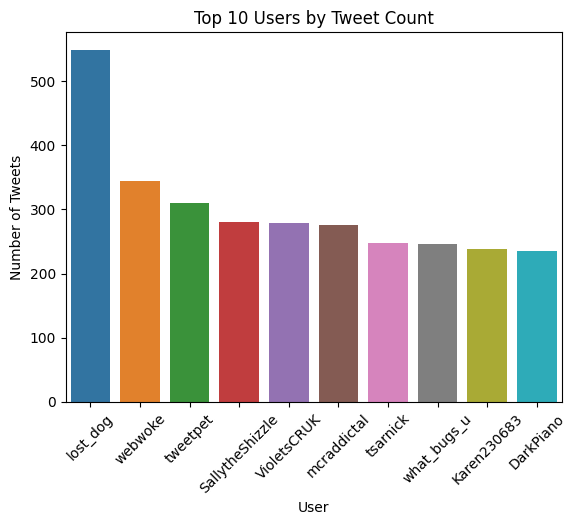

In [12]:
# User Analysis
user_counts = data["user"].value_counts()
top_users = user_counts.head(10)
sns.barplot(x=top_users.index, y=top_users.values)
plt.xlabel("User")
plt.ylabel("Number of Tweets")
plt.title("Top 10 Users by Tweet Count")
plt.xticks(rotation=45)
plt.show()

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
# Generate Word Clouds for each sentiment class
sentiment_classes = [0, 2, 4]  # Negative, Neutral, Positive

In [15]:
#Text Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, URLs, and mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub('@[^\s]+', '', text)   # Remove mentions
    text = re.sub('[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming (using Porter stemmer)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # Rejoin tokens into a processed text
    processed_text = ' '.join(stemmed_tokens)
    
    return processed_text

In [16]:
# Apply preprocessing to the dataset
data_sampled["processed_text"] = data_sampled["text"].apply(preprocess_text)

In [17]:
data_sampled.head(5)

,target,ids,date,flag,user,text,tweet_length,processed_text
212188,0,1974671472,Sat May 30 13:36:33 PDT 2009,NO_QUERY,crail00,@dickiemaxx Win a few; lose few a with a,45,win lose
299036,0,1997882402,Mon Jun 01 17:37:12 PDT 2009,NO_QUERY,ana_leal,@lavjonas tokio hotel and won tokio hotel that...,53,tokio hotel tokio hotel that bad
475977,0,2177756662,Mon Jun 15 06:39:05 PDT 2009,NO_QUERY,x__claireyy__x,"Right, off to work Only 5 hours to go until I...",56,right work hour go im free xd
385829,0,2053681109,Sat Jun 06 05:22:18 PDT 2009,NO_QUERY,karl_goddard,@daibarnes and guess who's landed that plum jo...,125,guess who land plum job moi host big conf juli...
138859,0,1880667015,Fri May 22 02:03:41 PDT 2009,NO_QUERY,jocxie,@rabbit_rabid can't sleep... come give me hug...,49,cant sleep come give hug


In [18]:
# Splitting the dataset
X = data_sampled["processed_text"]
y = data_sampled["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature Extraction
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [20]:
# Model Training and Evaluation
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier()
}

In [21]:
from sklearn.metrics import precision_recall_fscore_support

In [22]:
# Dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}


In [23]:
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    
    precision_scores[name] = precision
    recall_scores[name] = recall
    f1_scores[name] = f1
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")


Model: Naive Bayes
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      4014
           4       0.74      0.71      0.72      3986

    accuracy                           0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000


Model: SVM
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4014
           4       0.75      0.77      0.76      3986

    accuracy                           0.76      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.76      0.76      0.76      8000


Model: Random Forest
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      4014
           4       0.73      0.73      0.73      3986

    accuracy   

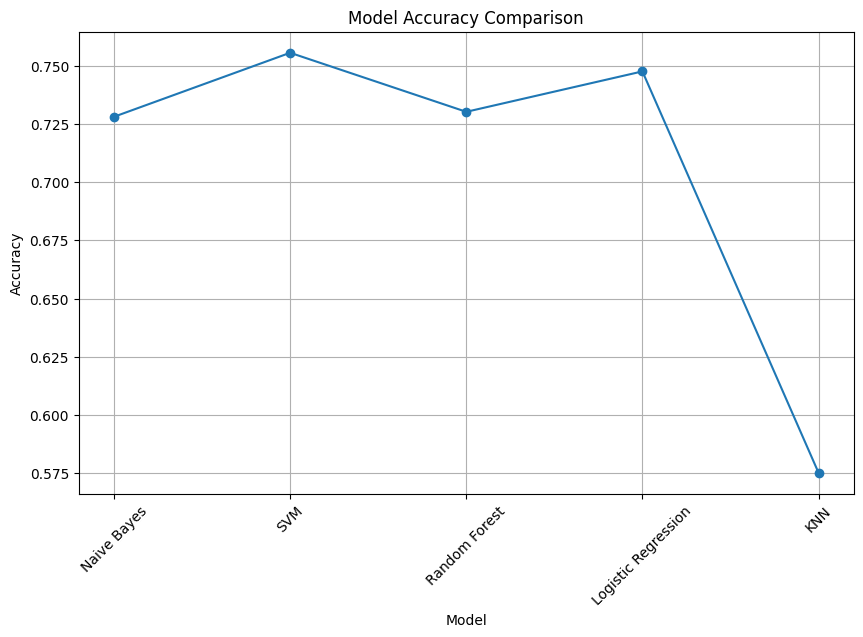

In [24]:
# Accuracy Line Graph
plt.figure(figsize=(10, 6))
plt.plot(accuracy_scores.keys(), accuracy_scores.values(), marker='o')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid()
plt.show()

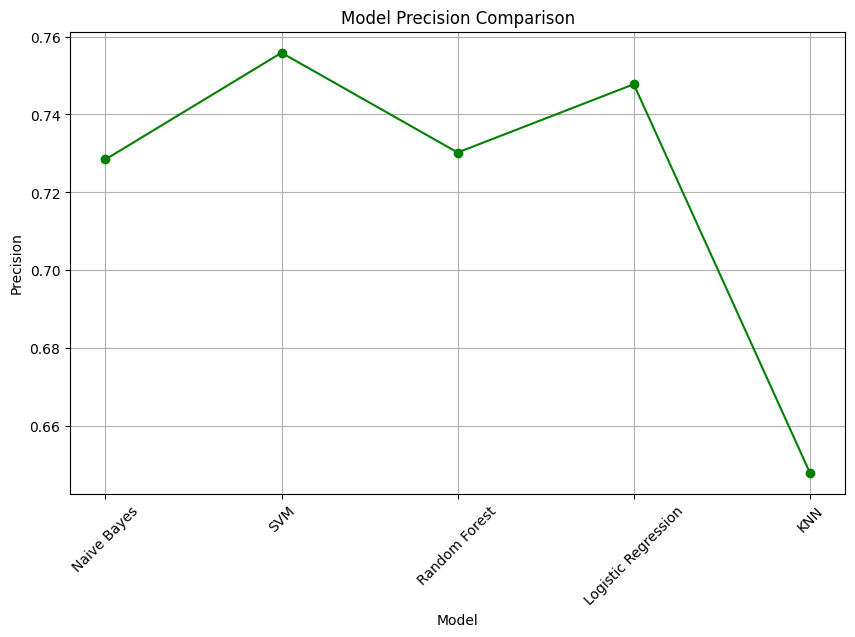

In [25]:
# Precision Line Graph
plt.figure(figsize=(10, 6))
plt.plot(precision_scores.keys(), precision_scores.values(), marker='o', color='green')
plt.title("Model Precision Comparison")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.xticks(rotation=45)
plt.grid()
plt.show()

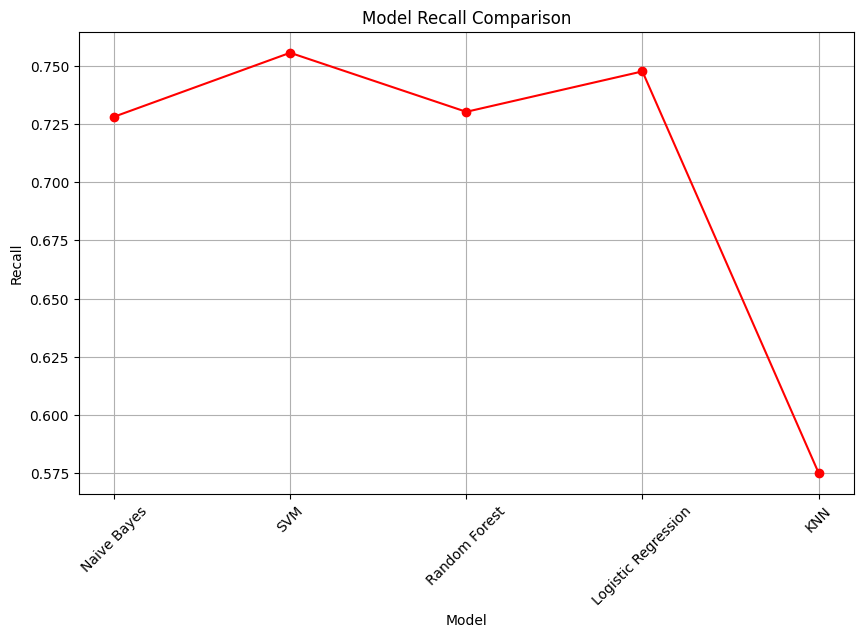

In [26]:

# Recall Line Graph
plt.figure(figsize=(10, 6))
plt.plot(recall_scores.keys(), recall_scores.values(), marker='o', color='red')
plt.title("Model Recall Comparison")
plt.xlabel("Model")
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.grid()
plt.show()

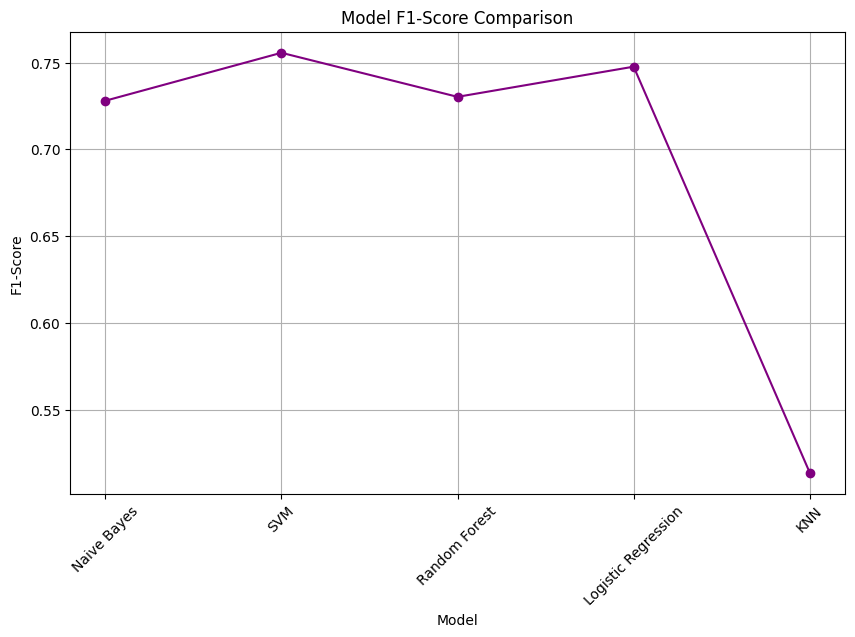

In [27]:
# F1-Score Line Graph
plt.figure(figsize=(10, 6))
plt.plot(f1_scores.keys(), f1_scores.values(), marker='o', color='purple')
plt.title("Model F1-Score Comparison")
plt.xlabel("Model")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [28]:
#Predicting Sentiment for new tweets
new_tweets = [
    "Just had the most amazing dinner with friends! Love spending quality time together. 😊🍕 #GoodTimes",
    "What a beautiful day! The sun is shining, and I'm feeling grateful for everything. ☀️🌼",
    "Today has been a terrible day. Everything went wrong, and I can't catch a break. 😔 #BadLuck",
    "Feeling really down and frustrated. Sometimes life just throws curveballs that are hard to handle.",
    "I aced my final exams! Hard work pays off, and I couldn't be happier. 🎉📚 #Success",
    "This movie was absolutely fantastic! The plot, acting, and visuals were all top-notch. #MovieNight",
    "I'm so excited for the upcoming vacation! Can't wait to relax by the beach and unwind. 🌴✈️ #Travel",
    "My laptop crashed right before I could finish my assignment. What a disaster! 💻🤦‍♂️ #TechProblems",
    "The traffic is unbearable today. Late for an important meeting and stressed out. 🚗🤯 #TrafficJam",
    "Just finished my daily workout at the gym. Feeling a bit tired but accomplished. 💪🏋️‍♀️ #Fitness",
    "Trying out a new recipe in the kitchen today. Fingers crossed it turns out delicious! 🍳👨‍🍳 #Cooking",
    "The weather outside is neither too hot nor too cold. Just perfect for a leisurely stroll. 🌦️🚶‍♀️ #Weather",
    "I'm so disappointed with the customer service I received. They were unhelpful and rude. 😡 #CustomerExperience",
    "Enjoying a quiet evening at home with a good book. Sometimes, it's nice to unwind. 📖🏡 #Relaxation"
    "Attended a seminar on data analytics. Learned a lot of useful insights for my work. #Learning"
  
]

In [29]:
preprocessed_new_tweets = [preprocess_text(tweet) for tweet in new_tweets]
new_tweets_vec = vectorizer.transform(preprocessed_new_tweets)

all_predictions = {}

for name, model in models.items():
    predictions = model.predict(new_tweets_vec)
    all_predictions[name] = predictions

# Create Result DataFrame
result_df = pd.DataFrame({
    "Tweet": new_tweets,
    **all_predictions
})

In [30]:
result_df

,Tweet,Naive Bayes,SVM,Random Forest,Logistic Regression,KNN
0,Just had the most amazing dinner with friends!...,4,4,4,4,0
1,"What a beautiful day! The sun is shining, and ...",4,4,0,4,0
2,Today has been a terrible day. Everything went...,0,0,0,0,0
3,Feeling really down and frustrated. Sometimes ...,0,0,0,0,0
4,"I aced my final exams! Hard work pays off, and...",4,0,0,0,0
5,"This movie was absolutely fantastic! The plot,...",4,4,4,4,0
6,I'm so excited for the upcoming vacation! Can'...,4,4,4,4,0
7,My laptop crashed right before I could finish ...,0,0,0,0,0
8,The traffic is unbearable today. Late for an i...,0,0,0,0,0
9,Just finished my daily workout at the gym. Fee...,4,4,0,4,0


In [31]:
import seaborn as sns

In [32]:
sns.set(style="whitegrid")

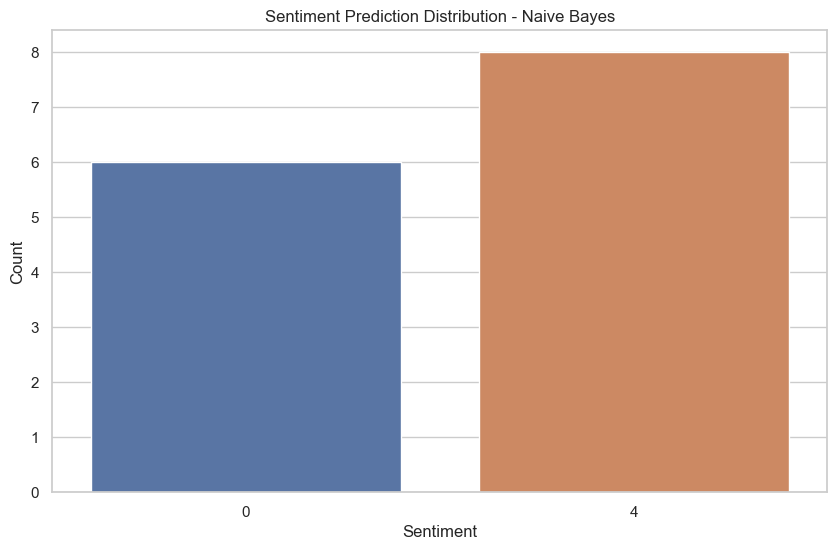

In [33]:
# Bar plot for the number of each sentiment prediction
plt.figure(figsize=(10, 6))
sns.countplot(data=result_df, x="Naive Bayes")
plt.title("Sentiment Prediction Distribution - Naive Bayes")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


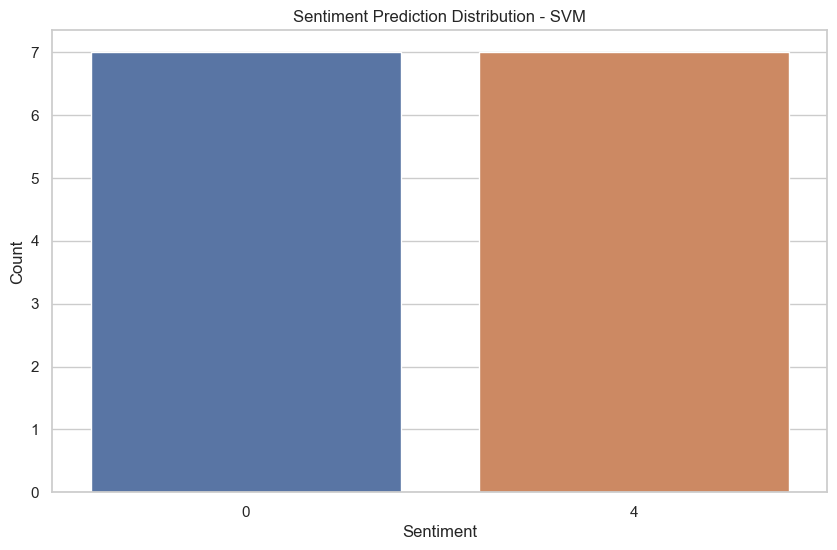

In [34]:
# Bar plot for the number of each sentiment prediction
plt.figure(figsize=(10, 6))
sns.countplot(data=result_df, x="SVM")
plt.title("Sentiment Prediction Distribution - SVM")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


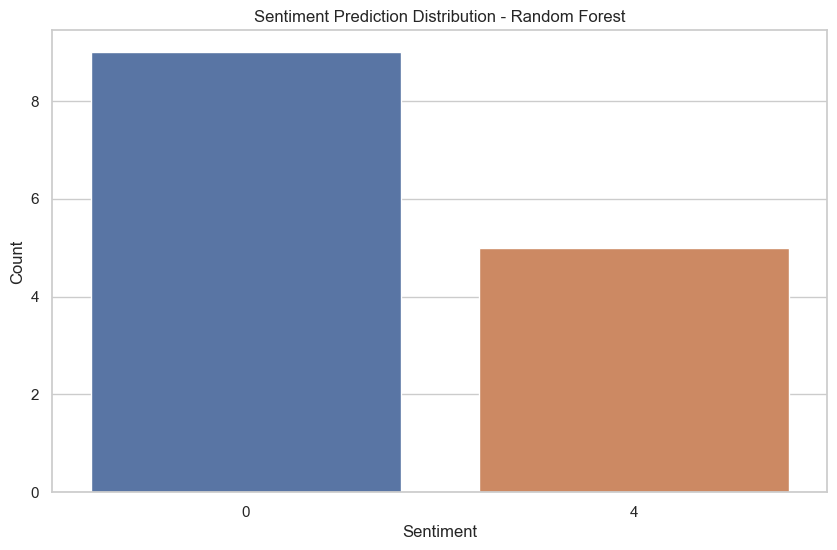

In [35]:
# Bar plot for the number of each sentiment prediction
plt.figure(figsize=(10, 6))
sns.countplot(data=result_df, x="Random Forest")
plt.title("Sentiment Prediction Distribution - Random Forest")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

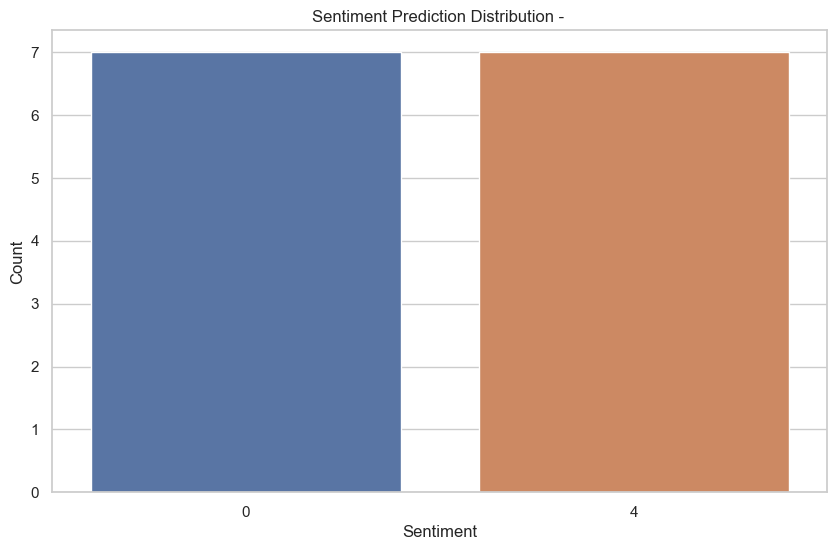

In [36]:
# Bar plot for the number of each sentiment prediction
plt.figure(figsize=(10, 6))
sns.countplot(data=result_df, x="Logistic Regression")
plt.title("Sentiment Prediction Distribution - ")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

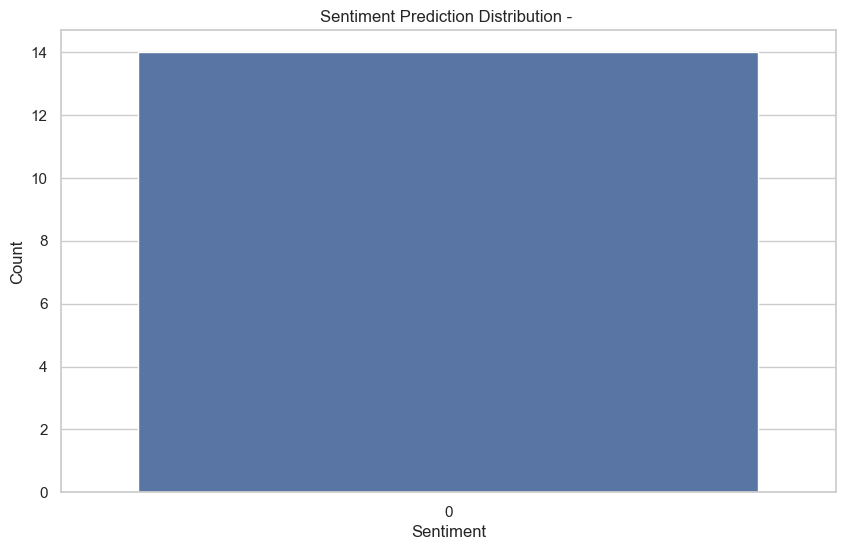

In [38]:
# Bar plot for the number of each sentiment prediction
plt.figure(figsize=(10, 6))
sns.countplot(data=result_df, x="KNN")
plt.title("Sentiment Prediction Distribution - ")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

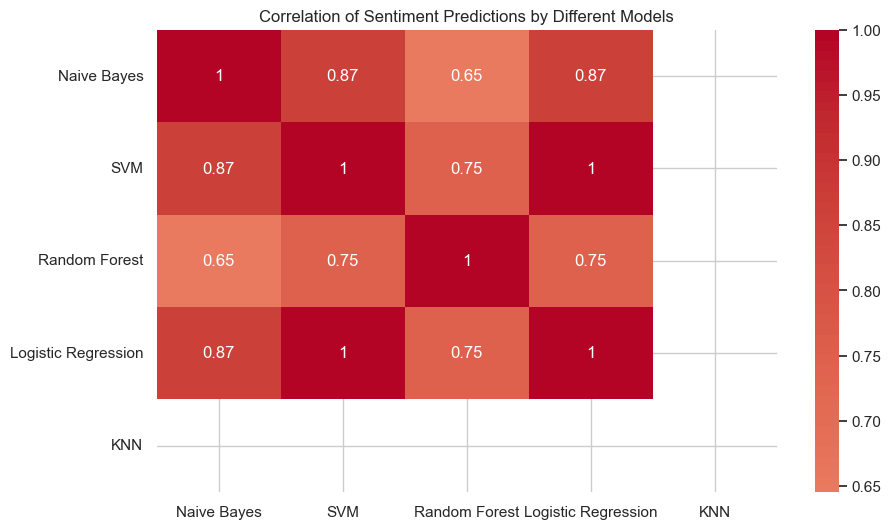

In [39]:
# Heatmap to visualize the correlation of predictions by different models
prediction_columns = ["Naive Bayes", "SVM", "Random Forest", "Logistic Regression", "KNN"]
correlation_matrix = result_df[prediction_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Sentiment Predictions by Different Models")
plt.show()